# Jiaming Lin       PS3

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1 Global temperature over time

In [2]:
# 1 Yes, we can ask this question because data includes the change of globe temperature from years to years

In [3]:
# 2
df = pd.read_csv("uahncdc_lt_6.0.csv", delim_whitespace=True)
print(df.shape)
df.head()

(511, 29)


,Year,Mo,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,...,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST
0,1978,12,-0.36,-0.36,-0.36,-0.31,-0.30,-0.32,-0.41,-0.49,...,-0.36,-0.24,-0.55,0.12,-0.35,-0.21,-0.42,-1.03,-0.94,-1.19
1,1979,1,-0.33,-0.48,-0.27,-0.48,-0.69,-0.35,-0.18,-0.00,...,-0.15,-0.11,-0.65,0.51,-0.11,-0.08,-0.12,-3.07,-2.25,1.16
2,1979,2,-0.27,-0.35,-0.24,-0.25,-0.32,-0.21,-0.29,-0.41,...,-0.27,-1.71,-2.06,-1.32,-0.68,-1.09,-0.49,-1.55,-1.59,-0.20
3,1979,3,-0.26,-0.31,-0.24,-0.28,-0.25,-0.29,-0.24,-0.44,...,-0.16,-0.32,-0.26,-0.39,-0.47,-1.20,-0.13,-0.43,-0.15,0.42
4,1979,4,-0.28,-0.40,-0.24,-0.31,-0.44,-0.23,-0.26,-0.32,...,-0.26,-0.44,-0.45,-0.42,-0.18,0.42,-0.46,-0.61,-0.28,-0.93


<IPython.core.display.Javascript object>


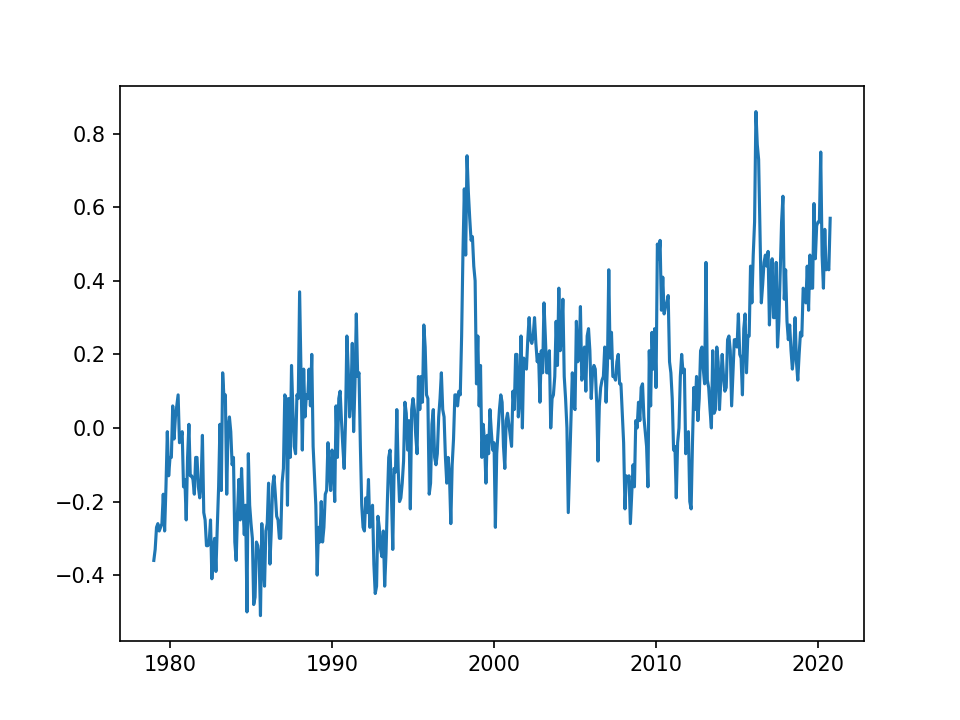

In [42]:
# 3
# Get only meaningful rows
df = df.iloc[0:502,]
# Change type of values in columns I want
df["Year"] = df["Year"].astype(float)
df["Mo"] = df["Mo"].astype(float)
# Mutate a new column "time"
df = df.assign(time = lambda x: x.Year + x.Mo/12)

# I want to plot change of globe temperature versus time
fig, ax = plt.subplots()
ax.plot(df.time, df.Globe)
# It seems that the change of temperature is gradually from getting colder to warmer

<IPython.core.display.Javascript object>


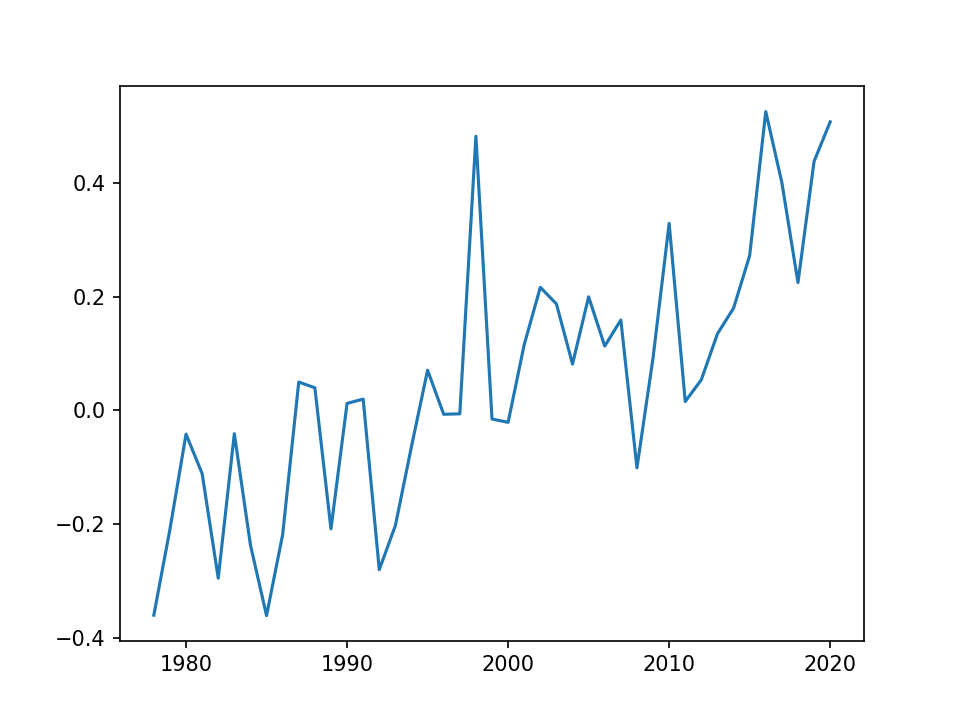

In [5]:
# 4
fig, ax = plt.subplots()
df["Globe"] = df["Globe"].astype(float)
# Calculate yearly average temperature
year_means = df.groupby("Year").\
Globe.\
agg([np.mean])

time = np.arange(1978,2021,1)
x = time
y = year_means
ax.plot(x,y)

<IPython.core.display.Javascript object>


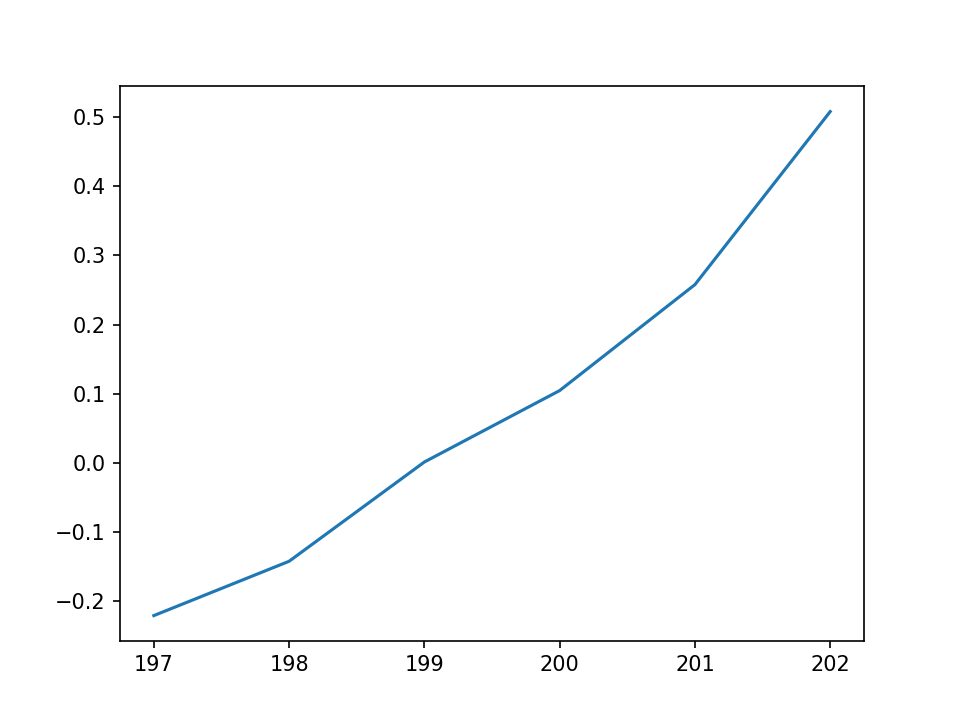

In [6]:
# 5
df = df.assign(decades = lambda x: x.Year//10)

decades_means = df.groupby("decades").\
Globe.\
agg([np.mean])

x = df.decades.unique()
y = decades_means

fig, ax = plt.subplots()
ax.plot(x,y)

In [7]:
# 6 I think the decades plot gives answer this question best, since it gives me a clear trend that the change of temperature is gradually
# from getting colder to getting warmer

<IPython.core.display.Javascript object>


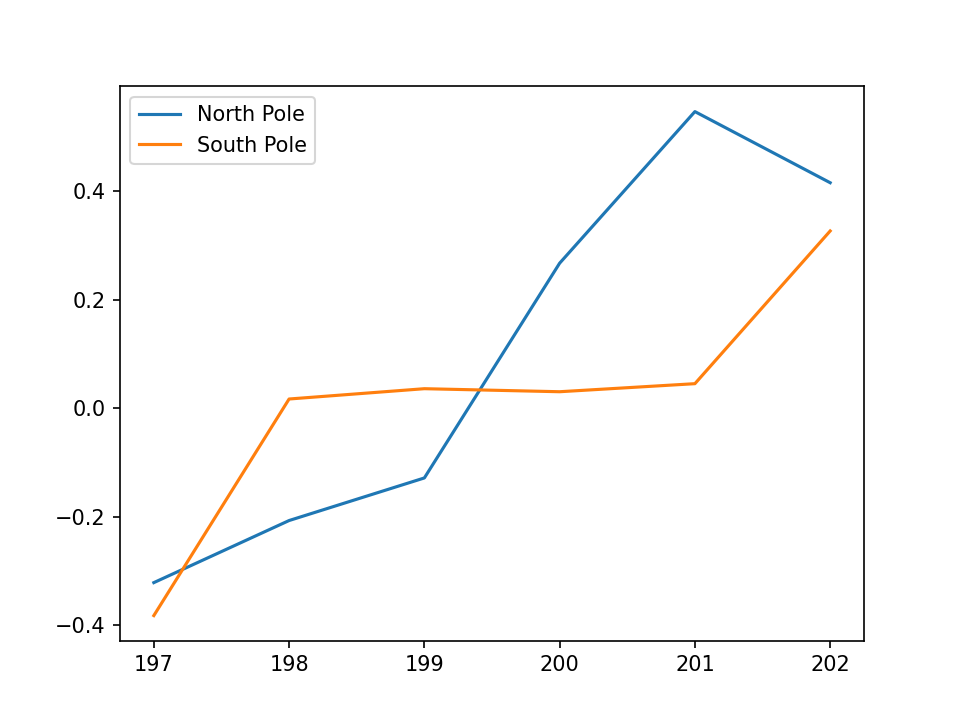

In [8]:
# 7
fig, ax = plt.subplots()

df["NoPol"] = df["NoPol"].astype(float)
df["SoPol"] = df["SoPol"].astype(float)

NoPol_means = df.groupby("decades").\
NoPol.\
agg([np.mean])

SoPol_means = df.groupby("decades").\
SoPol.\
agg([np.mean])

x = df.decades.unique()

ax.plot(x, NoPol_means, label = "North Pole")
ax.plot(x, SoPol_means, label = "South Pole")
ax.legend()

In [9]:
# 8 Both north ploar regions and south polar regions' temperature changes is from getting colder to getting warmer in past decades.
# Before 2000, it seems temperature change is warmer in south polar region than north ploar regions and warmer in north ploar region 
# than south ploar regions after 2000

## 2.1 Pareto-distributed Random Numbers

In [10]:
# 1 
N = 1000

<IPython.core.display.Javascript object>


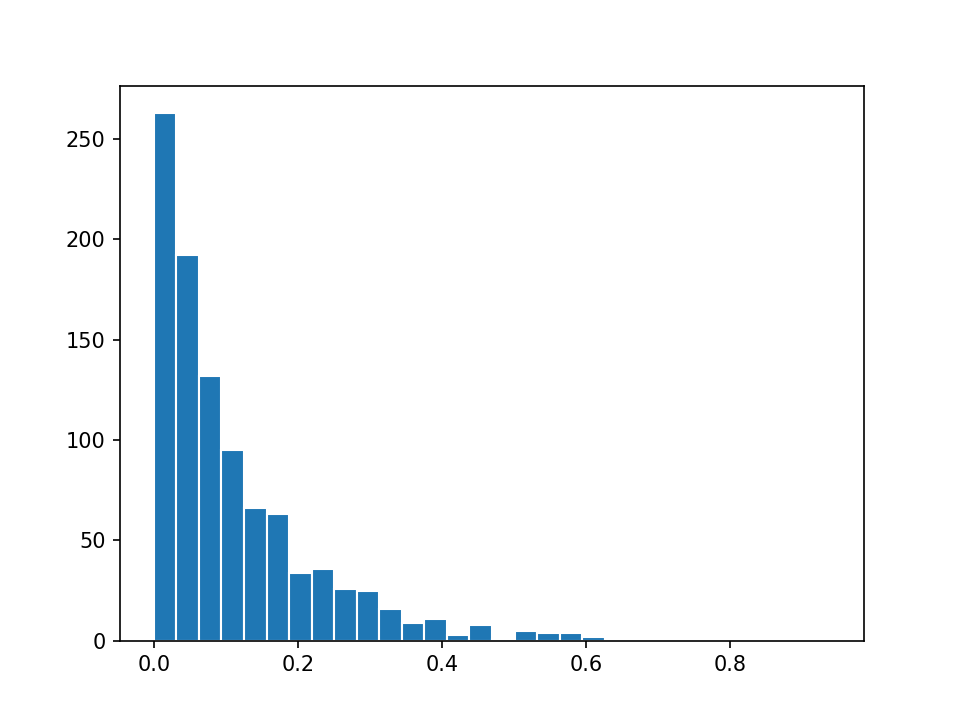

In [11]:
# 2
vec = np.random.pareto(10, N)
fig, ax = plt.subplots()
_ = ax.hist(vec, bins=30, edgecolor = "white")

# The shape is right skewed

In [12]:
# 3
# Report mean
print(np.mean(vec))
# Computed mean
print(1/9)
# Report variance
print(np.var(vec))
# Computed variance
v = 10/(8*(9**2))
print(v)
# The report mean, variance, and computed mean, variance have no big difference

0.11365252278560843
0.1111111111111111
0.014697367068970344
0.015432098765432098


<IPython.core.display.Javascript object>


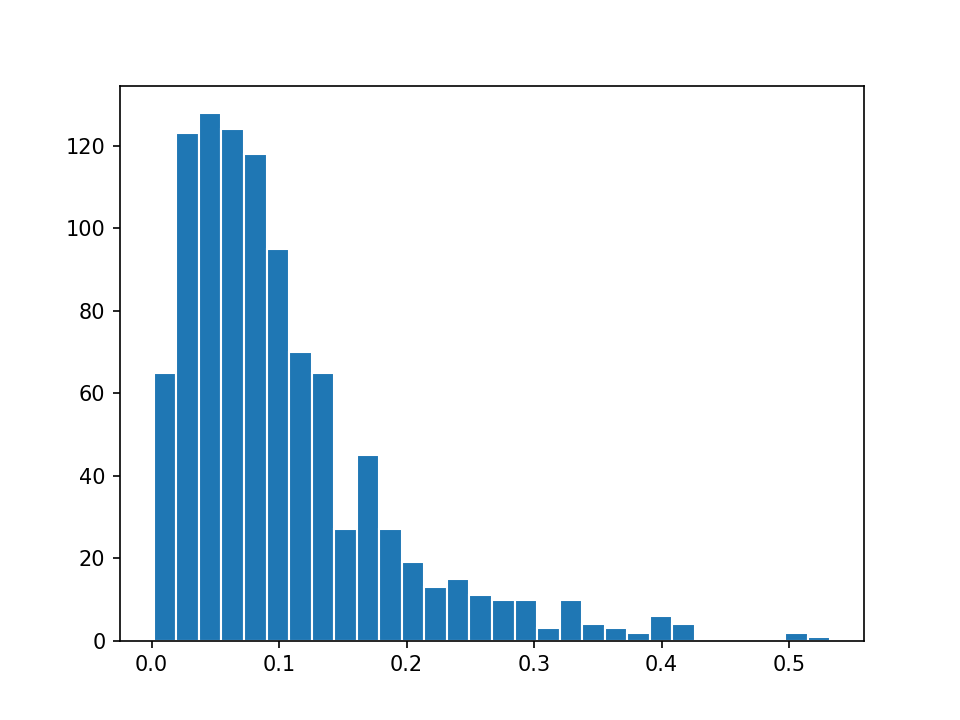

In [13]:
# 4
fig, ax = plt.subplots()

pair = np.random.pareto(10, size = (1000,2))
pair_mean = np.mean(pair, axis = 1)
#pair_mean = pair_mean.reshape(1000,1)

_ = ax.hist(pair_mean, bins=30, edgecolor = "white")

In [14]:
# 5
# Report mean of pair means
print(np.mean(pair_mean))
# Report variance of means
print(np.var(pair_mean))
# Computed mean
print(1/9)
# Computed variance
print(10/(8*(9**2))/2)

# Computed value and expected value do not have big difference

0.10256654752864715
0.006707254537331564
0.1111111111111111
0.007716049382716049


<IPython.core.display.Javascript object>


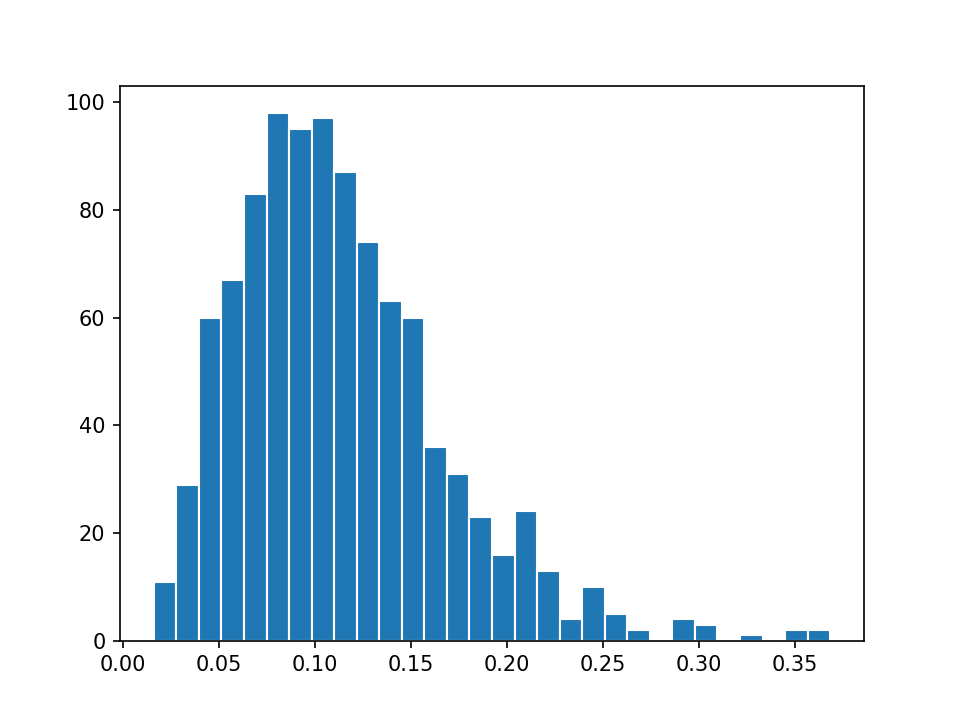

In [15]:
# 6
fig, ax = plt.subplots()

pair = np.random.pareto(10, size = (1000,5))
mean5 = np.mean(pair, axis = 1)
# The distribution tend to be more normal

_ = ax.hist(mean5, bins=30, edgecolor = "white")

In [16]:
# Actual mean and variance
print(np.mean(mean5))
print(np.var(mean5))

0.11328426510452266
0.002944020101011823


In [17]:
# Expected mean and variance
print(1/9)
print(v/5)

0.1111111111111111
0.0030864197530864196


<IPython.core.display.Javascript object>


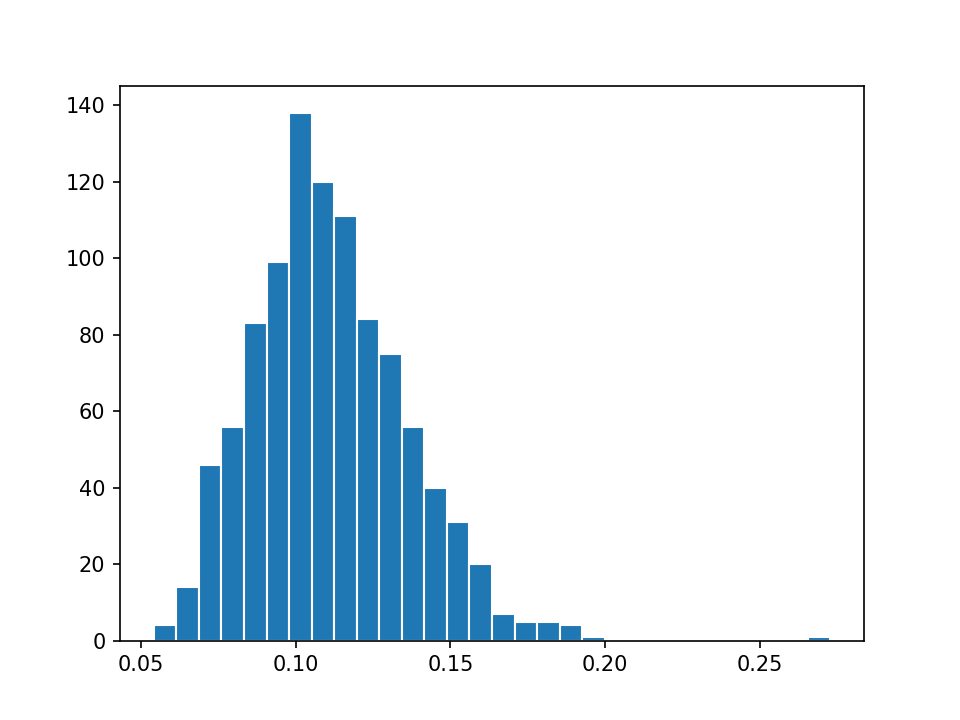

In [18]:
# 7
fig, ax = plt.subplots()

pair = np.random.pareto(10, size = (1000,25))
mean25 = np.mean(pair, axis = 1)
_ = ax.hist(mean25, bins=30, edgecolor = "white")

In [19]:
# Actual mean and variance
print(np.mean(mean25))
print(np.var(mean25))

0.11121835030265027
0.0006106205352008357


In [20]:
# Expected mean and variance
print(1/9)
print(v/25)

0.1111111111111111
0.0006172839506172839


<IPython.core.display.Javascript object>


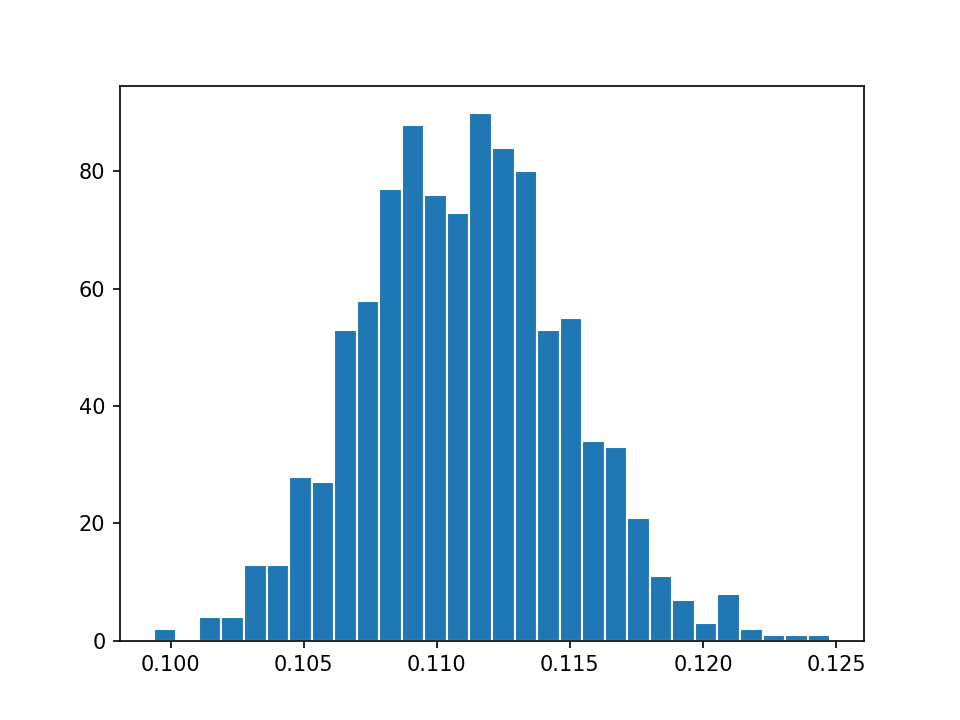

In [21]:
# 8
fig, ax = plt.subplots()

pair = np.random.pareto(10, size = (1000,1000))
mean1000 = np.mean(pair, axis = 1)
_ = ax.hist(mean1000, bins=30, edgecolor = "white")

In [22]:
# Actual mean and variance
print(np.mean(mean1000))
print(np.var(mean1000))

0.11105989370156362
1.4604440768196861e-05


In [23]:
# Expected mean and variance
print(1/9)
print(v/1000)

0.1111111111111111
1.54320987654321e-05


In [24]:
# 9 As the size of tuple increase, the distribution of means becomes increasingly normal

## 2.2 Discrete Random Variables

In [25]:
x = np.random.randint(0,2, size=(100,1))*2-1

In [26]:
# 1
# Expected value 
print(1*0.5+(-1)*0.5)
# Expected Variance Σx2p − μ2
print(0.5*1**(2)+0.5*(-1)**(2) - 0)
# Computed mean
print(np.mean(x))
# computed variance
print(np.var(x))

# Computed mean, variance and Expected mean and variance seems pretty similar

0.0
1.0
-0.06
0.9963999999999997


<IPython.core.display.Javascript object>


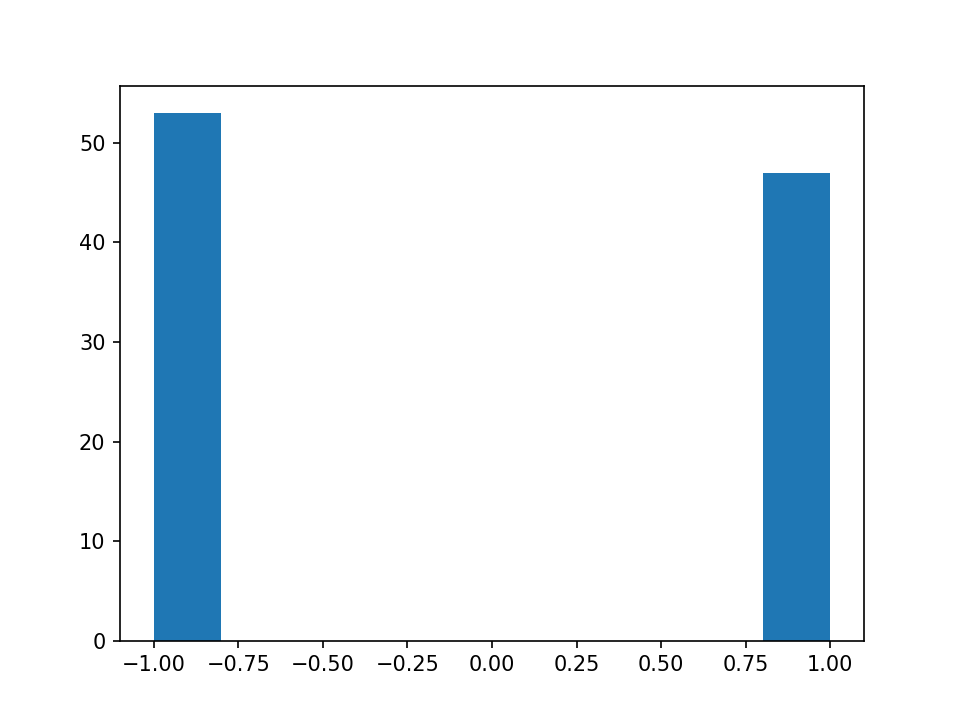

In [27]:
fig, ax = plt.subplots()
_ = ax.hist(x, bins=10)

<IPython.core.display.Javascript object>


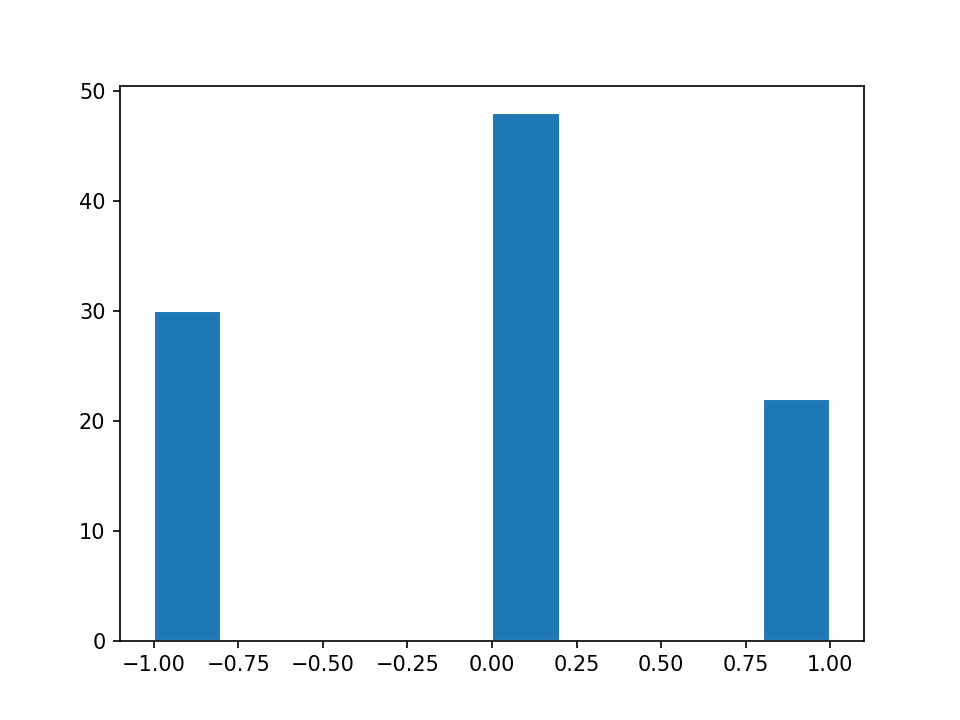

In [28]:
# 2 
x = np.random.randint(0,2, size=(100,2))*2-1
means = np.mean(x, axis = 1)

fig, ax = plt.subplots()
_ = ax.hist(means, bins=10, edgecolor = "white")

In [29]:
# Actual means and variance
print(np.mean(means))
print(np.var(means))

-0.08
0.5136000000000002


In [30]:
# Expected means and variance
print(0)
print(1/2)

0
0.5


<IPython.core.display.Javascript object>


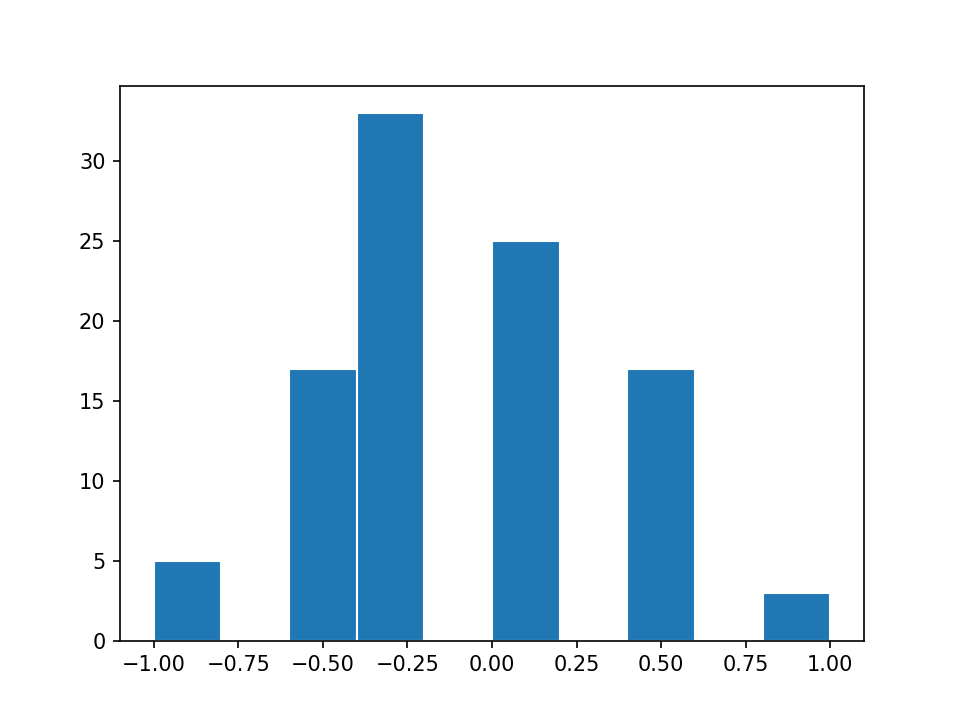

In [31]:
x = np.random.randint(0,2, size=(100,5))*2-1
means = np.mean(x, axis = 1)

fig, ax = plt.subplots()
_ = ax.hist(means, bins=10, edgecolor = "white")

In [32]:
# Actual means and variance
print(np.mean(means))
print(np.var(means))

-0.03599999999999998
0.22430399999999998


In [33]:
# Expected means and variance
print(0)
print(1/5)

0
0.2


<IPython.core.display.Javascript object>


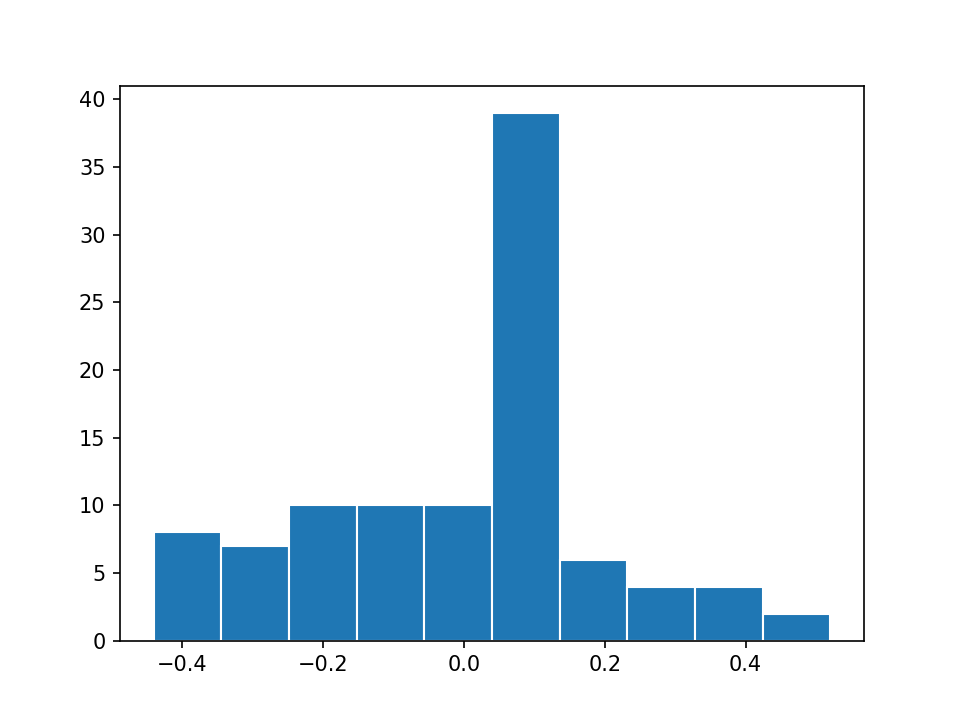

In [34]:
x = np.random.randint(0,2, size=(100,25))*2-1
means = np.mean(x, axis = 1)

fig, ax = plt.subplots()
_ = ax.hist(means, bins=10, edgecolor = "white")

In [35]:
# Actual means and variance
print(np.mean(means))
print(np.var(means))

-0.011199999999999996
0.04205056000000001


In [36]:
# Expected means and variance
print(0)
print(1/25)

0
0.04


<IPython.core.display.Javascript object>


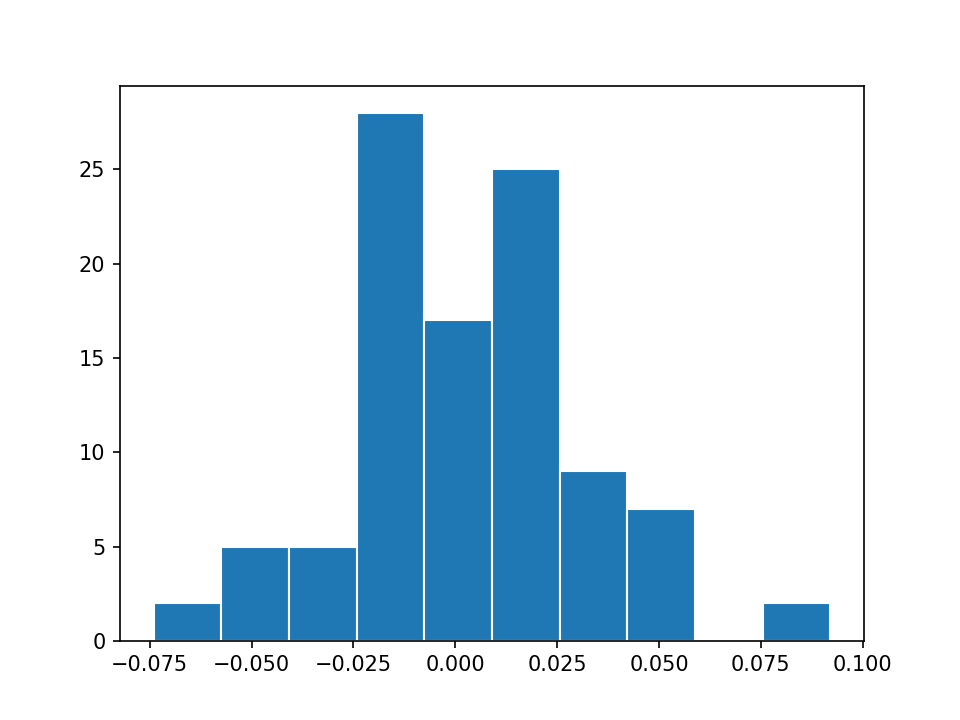

In [37]:
x = np.random.randint(0,2, size=(100,1000))*2-1
means = np.mean(x, axis = 1)

fig, ax = plt.subplots()
_ = ax.hist(means, bins=10, edgecolor = "white")

In [38]:
# Actual means and variance
print(np.mean(means))
print(np.var(means))

0.00294
0.0008622764


In [39]:
# Expected means and variance
print(0)
print(1/1000)

0
0.001


In [40]:
# 3
# When we incrase sample size from 1 to 2, the variance become half of original variance.CLT is bascially sampling distribution of means.
# Theoretically, The probability of a mean will become more consisitent with other means as we take more individual values to compute 
# each mean. Thus, if we get more number of values(1,2,5,25,1000) to compute each mean, distribution of thoses means will tend to be 
# more normal with smaller variance no matter what the original distribution looks like.

In [41]:
# I spend about 4 hours 